# K Using astroquery

* Astroquery: part of astropy : https://astroquery.readthedocs.io/en/latest/index.html

astroquery: An Astronomical Web-querying Package in Python 
Ginsburg, A., Sipocz, B. M., Brasseur, C. E., Cowperthwaite, P. S., Craig, M. W., Deil, C., Guillochon, J., Guzman, G., Liedtke, S., Lian Lim, P., Lockhart, K. E., Mommert, M., Morris, B. M., Norman, H., Parikh, M., Persson, M. V., Robitaille, T. P., Segovia, J.-C., Singer, L. P., Tollerud, E. J., de Val-Borro, M., Valtchanov, I., Woillez, J., Astroquery Collaboration, & a subset of astropy Collaboration
2019, Astronomical Journal, 157, 98

ABSTRACT: astroquery is a collection of tools for requesting data from databases hosted on remote servers with interfaces exposed on the internet, including those with web pages but without formal application program interfaces. These tools are built on the Python requests package, which is used to make HTTP requests, and astropy, which provides most of the data parsing functionality. astroquery modules generally attempt to replicate the web page interface provided by a given service as closely as possible, making the transition from browser-based to command-line interaction easy. astroquery has received significant contributions from throughout the astronomical community, including several from telescope archives. astroquery enables the creation of fully reproducible workflows from data acquisition through publication. This paper describes the philosophy, basic structure, and development model of the astroquery package. The complete documentation for astroquery can be found at <A href="http://astroquery.readthedocs.io/">http://astroquery.readthedocs.io/</A>.
ADS URL : https://ui.adsabs.harvard.edu/abs/2019AJ....157...98G

* Some examples of Astroquery uses:
 * part of astroquery: TAP/TAP+: https://astroquery.readthedocs.io/en/latest/utils/tap.html
 * Gaia TAP+: https://astroquery.readthedocs.io/en/latest/gaia/gaia.html
 * Atomic line list: https://astroquery.readthedocs.io/en/latest/atomic/atomic.html
 * Simbad: https://astroquery.readthedocs.io/en/latest/simbad/simbad.html
 * Vizier: https://astroquery.readthedocs.io/en/latest/vizier/vizier.html
 * This lecture explains step by step how to extract information from the Gaia database: https://allendowney.github.io/AstronomicalData/
 
* Talk on astroquery from ADASS XXX conference : https://www.youtube.com/watch?v=FcLvhgSHLl0


In [25]:
import matplotlib.pyplot as plt

### Querying Vizier

In [27]:
try:
    from astroquery.vizier import Vizier
except:
    !pip install astroquery
    from astroquery.vizier import Vizier

In [4]:
catalog_list = Vizier.find_catalogs('Kang W51')

In [28]:
catalog_list

OrderedDict([('J/ApJ/684/1143', </>),
             ('J/ApJ/736/87', </>),
             ('J/ApJ/738/79', </>),
             ('J/ApJ/760/12', </>),
             ('J/ApJ/785/119', </>),
             ('J/ApJ/813/39', </>),
             ('J/ApJ/839/12', </>),
             ('J/ApJ/859/4', </>),
             ('J/ApJ/879/10', </>),
             ('J/ApJ/886/75', </>),
             ('J/ApJ/886/93', </>),
             ('J/ApJ/887/134', </>),
             ('J/ApJ/889/L34', </>),
             ('J/ApJ/892/93', </>),
             ('J/ApJ/902/104', </>),
             ('J/ApJS/165/360', </>),
             ('J/ApJS/191/232', </>),
             ('J/ApJS/236/51', </>),
             ('J/ApJS/238/29', </>),
             ('J/ApJS/249/33', </>),
             ('J/ApJS/258/40', </>),
             ('J/A+A/454/717', </>),
             ('J/A+A/548/A29', </>),
             ('J/A+A/563/A120', </>),
             ('J/A+A/578/A51', </>),
             ('J/A+A/622/A81', </>),
             ('J/A+A/642/A85', </>),
        

In [30]:
catalogs = Vizier.get_catalogs('J/ApJ/706/83/ysos')
print(catalogs)

TableList with 1 tables:
	'0:J/ApJ/706/83/ysos' with 22 column(s) and 737 row(s) 


In [31]:
Vizier.ROW_LIMIT = -1
catalogs = Vizier.get_catalogs('J/ApJ/706/83/ysos')
print(catalogs)

TableList with 1 tables:
	'0:J/ApJ/706/83/ysos' with 22 column(s) and 737 row(s) 


In [32]:
Table = catalogs['J/ApJ/706/83/ysos']

In [34]:
type(Table)

astropy.table.table.Table

In [33]:
print(Table)

Seq f_Seq      SSTGLMC       AV   Mstar  ...  A  _2M Simbad  _Glon    _Glat  
                            mag  solMass ...                  deg      deg   
--- ----- ----------------- ---- ------- ... --- --- ------ -------- --------
  1       G048.7567-00.6341  4.0     3.0 ...   F  2M Simbad  48.7567  -0.6341
  2       G048.7579-00.2797  1.6     2.7 ...   F  2M Simbad  48.7579  -0.2797
  3       G048.7605-00.0388 33.3     4.1 ...   W  2M Simbad  48.7605  -0.0388
  4       G048.7618+00.0627 51.8     4.0 ...   W  2M Simbad  48.7618   0.0627
  5       G048.7637+00.2022 25.7     3.5 ...   W  2M Simbad  48.7637   0.2022
  6       G048.7655+00.1017  3.0     3.2 ...   F  2M Simbad  48.7655   0.1017
...   ...               ...  ...     ... ... ... ...    ...      ...      ...
731       G049.9937+00.0231  6.4     3.2 ...   F  2M Simbad  49.9937   0.0231
732       G049.9952-00.0063 12.5     4.9 ...   W  2M Simbad  49.9952  -0.0063
733       G049.9972+00.2599 33.6     5.6 ...   W  2M Simbad  49.

In [10]:
print(Table.keys())

['Seq', 'f_Seq', 'SSTGLMC', 'AV', 'Mstar', 'Ltot', 'Stg', 'Cl1', 'Cl2', 'Jmag', 'Hmag', 'Ksmag', '__3.6_', '__4.5_', '__5.8_', '__8.0_', '__24_', 'A', '_2M', 'Simbad', '_Glon', '_Glat']


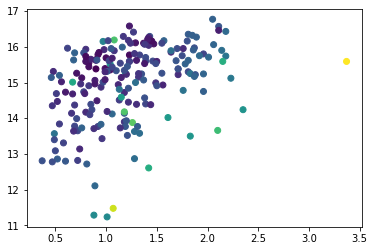

In [11]:
f, ax = plt.subplots()
ax.scatter(Table['Jmag'] - Table['Hmag'], Table['Jmag'], c=Table['Mstar']);

### Querying MAST

https://archive.stsci.edu/access-mast-data

In [35]:
from astroquery.mast import Catalogs, Observations

In [36]:
obs_table = Observations.query_object("IC 418",radius=".02 deg")

In [37]:
obs_table.show_in_browser(jsviewer=True)

In [38]:
mask_spectrum = obs_table['dataproduct_type'] == 'spectrum'

In [39]:
print(len(obs_table), mask_spectrum.sum())

203 82


In [40]:
data_products_by_obs = Observations.get_product_list(obs_table[mask_spectrum][0:2])

In [41]:
data_products_by_obs.show_in_browser(jsviewer=True)

In [20]:
obs1 = Observations.download_products('295913', productType="SCIENCE")

In [21]:
obs1

Local Path,Status,Message,URL
str48,str8,object,object
./mastDownload/IUE/lwr02252/lwr02252.mxlo.gz,COMPLETE,None,None
./mastDownload/IUE/lwr02252/lwr02252mxlo_vo.fits,COMPLETE,None,None


### Catalogs

In [22]:
catalog_data = Catalogs.query_object("IC 418")

In [24]:
catalog_data

MatchID,Distance,MatchRA,MatchDec,DSigma,AbsCorr,NumFilters,NumVisits,NumImages,StartTime,StopTime,StartMJD,StopMJD,TargetName,CI,CI_Sigma,KronRadius,KronRadius_Sigma,Extinction,SpectrumFlag,W2_F502N,W2_F502N_MAD,W2_F502N_N,W2_F555W,W2_F555W_MAD,W2_F555W_N,W2_F606W,W2_F606W_MAD,W2_F606W_N,W2_F656N,W2_F656N_MAD,W2_F656N_N,W2_F658N,W2_F658N_MAD,W2_F658N_N
str9,float64,float64,float64,float64,str1,int64,int64,int64,str21,str21,float64,float64,str10,float64,float64,float64,float64,float64,str1,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64
90374054,0.00565599521966206,81.86755647816761,-12.697274723428315,140.12916369880315,Y,3,2,5,/Date(937279573430)/,/Date(1189379756870)/,51435.14321097685,54352.969408194534,IC418,2.7597674796916367,0.7014744682366316,0.45499999999999996,0.0,0.2232816070318222,N,11.487844467163086,0.7058448791503906,2,13.508299827575684,0.0,1,nan,nan,0,nan,nan,0,11.417695045471191,0.3621950149536133,2
59074158,0.011870704932628309,81.8675081,-12.6970878,0.0,N,1,1,1,/Date(919163413257)/,/Date(919165173380)/,51225.46543117147,51225.48580298154,PK215-24D1,1.3282477315459005,0.0,0.45499999999999996,0.0,0.2232816070318222,N,nan,nan,0,nan,nan,0,nan,nan,0,11.700789451599121,0.0,1,nan,nan,0
85650262,0.012636542260362472,81.867462,-12.697490600000002,0.0,N,1,1,1,/Date(919163413257)/,/Date(919165173380)/,51225.46543117147,51225.48580298154,PK215-24D1,3.672507594359245,0.0,0.45499999999999996,0.0,0.2232816070318222,N,nan,nan,0,nan,nan,0,nan,nan,0,13.073589324951172,0.0,1,nan,nan,0
49514032,0.013779232245273892,81.8673507,-12.6970766,0.0,N,1,1,1,/Date(1002132615097)/,/Date(1002133515093)/,52185.75711911125,52185.76753574284,IC418,2.0561933157307144,0.0,0.45499999999999996,0.0,0.2232816070318222,N,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0,12.264599800109863,0.0,1
3849061,0.022872907687266495,81.86745490070544,-12.697661182669316,0.0,Y,1,1,1,/Date(1189374496997)/,/Date(1189375876997)/,54352.908530027606,54352.9245022363,IC418,3.8767163433245755,0.0,0.45499999999999996,0.0,0.2232816070318222,N,13.405989646911621,0.0,1,nan,nan,0,nan,nan,0,nan,nan,0,nan,nan,0
79528152,0.027203546688822525,81.8675458104757,-12.697725597380884,0.0,Y,3,1,3,/Date(937279573430)/,/Date(937287233430)/,51435.14321097685,51435.23186839372,IC418,3.234443902714927,0.20027712778925374,0.4549999999999999,6.798699777552591e-17,0.2232816070318222,N,12.978099822998047,0.0,1,16.269100189208984,0.0,1,nan,nan,0,nan,nan,0,16.81999969482422,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98018064,6.207720095622486,81.78285300240735,-12.634908449161575,0.0,Y,1,1,1,/Date(921328453407)/,/Date(921330593407)/,51250.52376624057,51250.5485347826,ANY,1.9106977207716123,0.0,0.3710000216960907,0.0,0.2315555065870285,N,nan,nan,0,nan,nan,0,25.186500549316406,0.0,1,nan,nan,0,nan,nan,0
24343268,6.239877103651029,81.80339943978788,-12.614160758091833,0.0,Y,1,1,1,/Date(921328453407)/,/Date(921330593407)/,51250.52376624057,51250.5485347826,ANY,1.9168604251950287,0.0,0.3499999940395355,0.0,0.2315555065870285,N,nan,nan,0,nan,nan,0,18.99449920654297,0.0,1,nan,nan,0,nan,nan,0


In [23]:
catalog_data.show_in_browser(jsviewer=True)